In [2]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python

  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/aa/2e/576ac47f21d555b459ca837bb3fb937e50339b8fbfd294945ea2f5290416/opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.3 MB 495.5 kB/s eta 0:01:32
   ---------------------------------------- 0.1/45.3 MB 1.0 MB/s eta 0:00:44
   ---------------------------------------- 0.2/45.3 MB 1.2 MB/s eta 0:00:37
   ---------------------------------------- 0.4/45.3 MB 2.0 MB/s eta 0:00:23
    --------------------------------------- 0.6/45.3 MB 2.5 MB/s eta 0:00:18
    --------------------------------------- 0.8/45.3 MB 2.7 MB/s eta 0:00:17
    --------------------------------------- 1.0/45.3 MB 2.8 MB/s eta 0:00:17
   - -------------------------------------- 1.2/45.3 MB 3.2 MB/s eta 0:00:14
   - 

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [6]:
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

train_dataset = train.flow_from_directory("C:\\Users\\srini\\Downloads\\archive\\forest_fire\\Training and Validation",
                                          target_size = (150, 150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("C:\\Users\\srini\\Downloads\\archive\\forest_fire\\Testing",
                                          target_size = (150, 150),
                                          batch_size = 32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [7]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [8]:
#Building the model
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
#Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)

Epoch 1/5


58/58 [==============================] - 84s 1s/step - loss: 0.3259 - accuracy: 0.8614 - val_loss: 0.2880 - val_accuracy: 0.8971
Epoch 2/5
58/58 [==============================] - 39s 671ms/step - loss: 0.1725 - accuracy: 0.9410 - val_loss: 0.4599 - val_accuracy: 0.7941
Epoch 3/5
58/58 [==============================] - 40s 688ms/step - loss: 0.1435 - accuracy: 0.9536 - val_loss: 0.2077 - val_accuracy: 0.9559
Epoch 4/5
58/58 [==============================] - 41s 699ms/step - loss: 0.1258 - accuracy: 0.9580 - val_loss: 0.1802 - val_accuracy: 0.9559
Epoch 5/5
58/58 [==============================] - 40s 684ms/step - loss: 0.0967 - accuracy: 0.9683 - val_loss: 0.1006 - val_accuracy: 0.9559


In [11]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 1s 79ms/step


In [12]:
predictions


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [13]:
print(len(predictions))

68


In [14]:
def predictImage(filename):
    img1 = image.load_img(filename, target_size=(150, 150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y, axis = 0)
    val = model.predict(X)
    print(val)
    if val==1:
        plt.xlabel("No Fire", fontsize = 30)
    elif val == 0:
        plt.xlabel("Fire", fontsize = 30)

1/1 [==============================] - 1s 718ms/step
[[1.]]


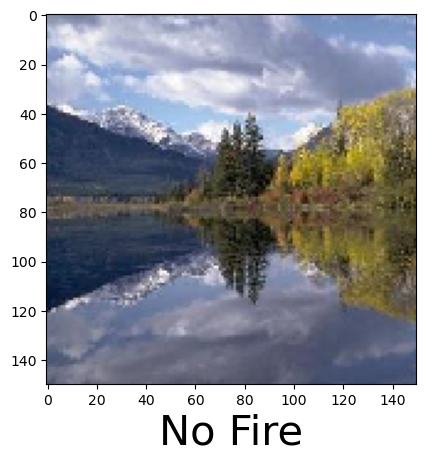

In [15]:
predictImage("C:\\Users\\srini\\Downloads\\archive\\forest_fire\\Testing\\nofire\\abc372.jpg")

1/1 [==============================] - 0s 32ms/step
[[0.]]


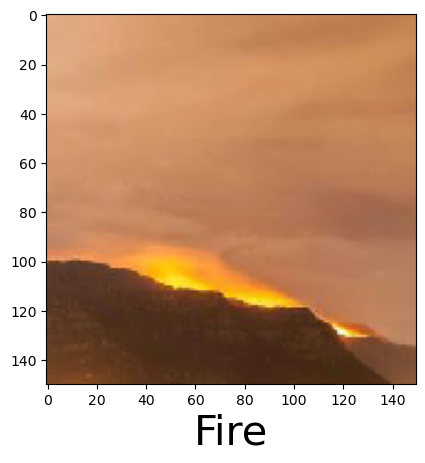

In [17]:
predictImage("C:\\Users\\srini\\Downloads\\archive\\forest_fire\\Testing\\fire\\abc185.jpg")